In [1]:
from sympy import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x,f,y = symbols('x f y')

In [3]:
f_b = exp(-x)*cos(2*pi*x)

In [4]:
int_b = integrate(f_b, x)

In [5]:
print_latex(int_b)

\frac{2 \pi \sin{\left(2 \pi x \right)}}{e^{x} + 4 \pi^{2} e^{x}} - \frac{\cos{\left(2 \pi x \right)}}{e^{x} + 4 \pi^{2} e^{x}}


In [6]:
int_b_res = int_b.subs(x, 1).evalf() - int_b.subs(x, 0).evalf()

In [7]:
int_b_res

0.0156162369044908

In [8]:
N(int_b_res, 13)

0.01561623690449

In [9]:
df = pd.read_csv('saida-2-erro-13687303.csv', header=0)
df_str = pd.read_csv('saida-2-erro-13687303.csv', header=0, dtype=str)

In [10]:
df_str.head()

,n,h,tr,sp,bl
0,12,0.08333333333,0.00037083460,0.00002096441,0.00000402326
1,24,0.04166666667,0.00009176391,0.00000125965,0.00000005400
2,48,0.02083333333,0.00002288231,0.00000007822,0.00000000054
3,96,0.01041666667,0.00000571672,0.00000000514,0.00000000027
4,192,0.00520833333,0.00000142874,0.00000000058,0.00000000028


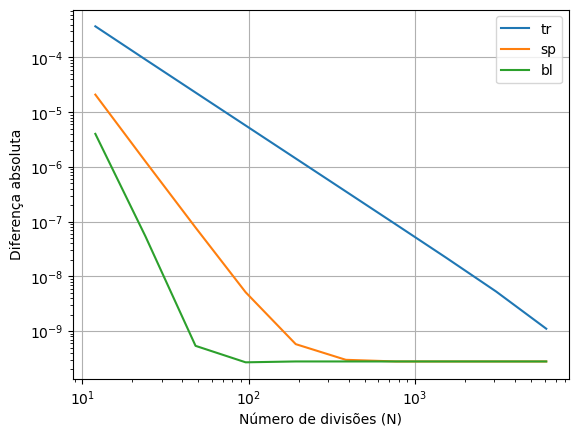

In [23]:
f1, ax1 = plt.subplots()
ax1.plot(df['n'], df['tr'], label='tr')
ax1.plot(df['n'], df['sp'], label='sp')
ax1.plot(df['n'], df['bl'], label='bl')
ax1.legend()
ax1.grid()
ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.set_ylabel('Diferença absoluta')
ax1.set_xlabel('Número de divisões (N)')

f1.savefig('tarefa-b-graf-1-13687303.pdf', dpi=300, bbox_inches='tight')

In [12]:
import LabIFSC as lab

In [13]:
df.head()

,n,h,tr,sp,bl
0,12,0.083333,0.000371,2.096441e-05,4.023260e-06
1,24,0.041667,0.000092,1.259650e-06,5.400000e-08
2,48,0.020833,0.000023,7.822000e-08,5.400000e-10
3,96,0.010417,0.000006,5.140000e-09,2.700000e-10
4,192,0.005208,0.000001,5.800000e-10,2.800000e-10


In [14]:
list(df.columns)

['n', 'h', 'tr', 'sp', 'bl']

In [15]:
list(df['n'])

[12, 24, 48, 96, 192, 384, 768, 1536, 3072, 6144]

In [16]:
tab = lab.Tabela(titulo='Diferenças absolutas para cada método de integração')

In [17]:
for col in list(df_str.columns):
    tab.addColuna(lab.arrayM(arrayNominal=df_str[col], incertezas=0.0, unidades='', transformer=list), titulo=col)

In [18]:
print(tab.gerarLatex())

\begin{table}[H]
\centering
\caption{Diferenças absolutas para cada método de integração}
\label{yourLabelHere}
\begin{tabular}{|c|c|c|c|c|}
\hline
\textbf{n () $\pm$ 0 ()}&\textbf{h () $\pm$ 0 ()}&\textbf{tr () $\pm$ 0 ()}&\textbf{sp () $\pm$ 0 ()}&\textbf{bl () $\pm$ 0 ()}\\ \hline
12,0&0,08333333333&0,0003708346&2,096441e-05&4,02326e-06\\ \hline
24,0&0,04166666667&9,176391e-05&1,25965e-06&5,4e-08\\ \hline
48,0&0,02083333333&2,288231e-05&7,822e-08&5,4e-10\\ \hline
96,0&0,01041666667&5,71672e-06&5,14e-09&2,7e-10\\ \hline
192,0&0,00520833333&1,42874e-06&5,8e-10&2,8e-10\\ \hline
384,0&0,00260416667&3,5696e-07&3e-10&2,8e-10\\ \hline
768,0&0,00130208333&8,903e-08&2,8e-10&2,8e-10\\ \hline
1536,0&0,00065104167&2,205e-08&2,8e-10&2,8e-10\\ \hline
3072,0&0,00032552083&5,3e-09&2,8e-10&2,8e-10\\ \hline
6144,0&0,00016276042&1,11e-09&2,8e-10&2,8e-10\\ \hline
\end{tabular}
\caption*{Fonte: Autoria própria}
\end{table}



In [20]:
print(df_str.to_latex(index=False))

\begin{tabular}{lllll}
\toprule
   n &                        h &                       tr &                       sp &                       bl \\
\midrule
  12 &            0.08333333333 &            0.00037083460 &            0.00002096441 &            0.00000402326 \\
  24 &            0.04166666667 &            0.00009176391 &            0.00000125965 &            0.00000005400 \\
  48 &            0.02083333333 &            0.00002288231 &            0.00000007822 &            0.00000000054 \\
  96 &            0.01041666667 &            0.00000571672 &            0.00000000514 &            0.00000000027 \\
 192 &            0.00520833333 &            0.00000142874 &            0.00000000058 &            0.00000000028 \\
 384 &            0.00260416667 &            0.00000035696 &            0.00000000030 &            0.00000000028 \\
 768 &            0.00130208333 &            0.00000008903 &            0.00000000028 &            0.00000000028 \\
1536 &            0.00065104167

/tmp/ipykernel_99554/3573550689.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_str.to_latex(index=False))
